In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten

from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train, x_test = x_train/255, x_test/255

In [0]:
in_layer = Input(shape=(28, 28))
flat = Flatten()(in_layer)
d = Dense(units=400, activation="linear")(flat)
d = Dense(units=50, activation="linear")(d)
d = Dense(units=400, activation="linear")(d)
d = Dense(units=784, activation="sigmoid")(d)
out_layer = Reshape(target_shape=(28, 28))(d)

In [0]:
model = Model(inputs=in_layer, outputs=out_layer)

In [21]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_6 (Dense)              (None, 400)               20400     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               314384    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0   

In [0]:
model.compile(optimizer="adam", loss="mse")

In [23]:
model.fit(x_train, x_train, epochs=1)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0130


In [0]:
out = model.predict(x_test[:5])

In [25]:
out.shape

(5, 28, 28)

In [0]:
out = out - out.min()
out = out / out.max()

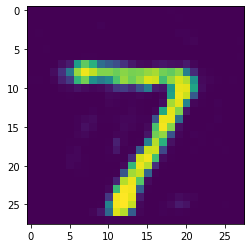

In [27]:
plt.imshow(out[0])

In [28]:
model.layers

In [0]:
encoder = Model(inputs=model.input, outputs=model.layers[3].output)

In [30]:
encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                20050     
Total params: 334,050
Trainable params: 334,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
encoder.predict(x_test).shape

(10000, 50)

In [32]:
x_test.shape

(10000, 28, 28)